<a href="https://colab.research.google.com/github/NiloufarYousefi/-Final-project/blob/main/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

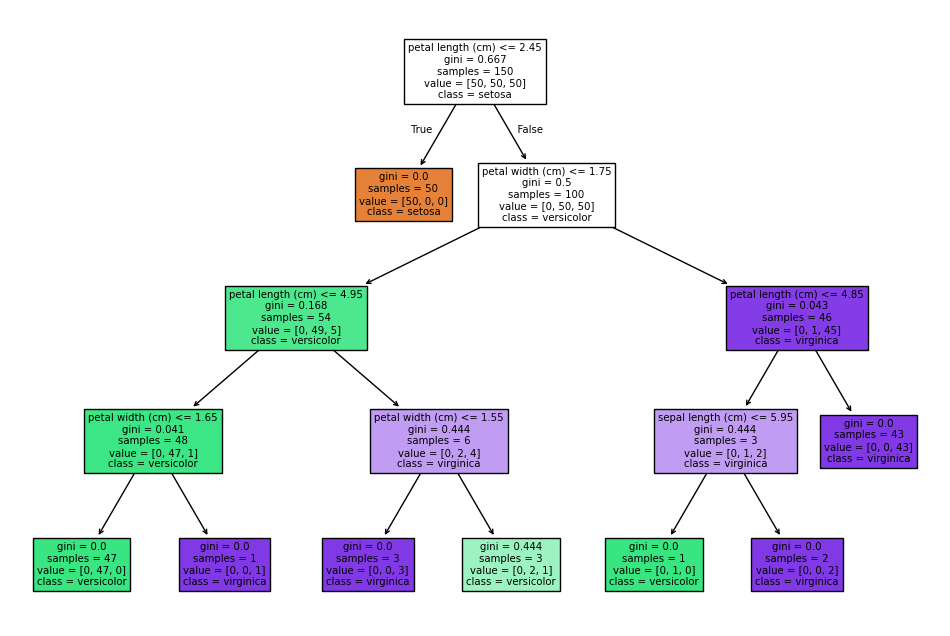

Number of pure leaves: 15
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        38
           1       0.92      0.93      0.93        76

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



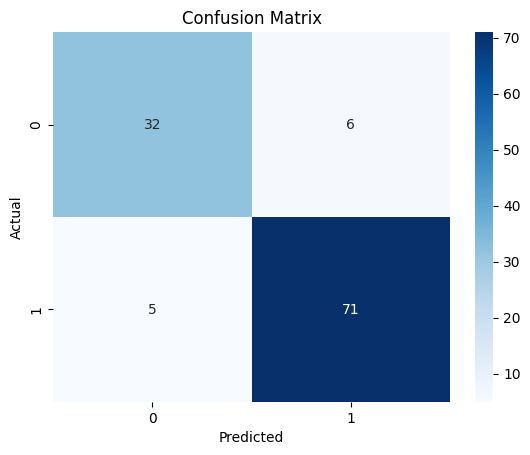

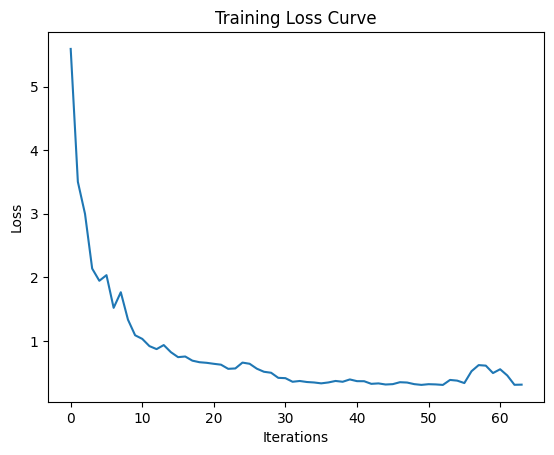

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=17)
clf.fit(X_iris, y_iris)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# Count pure leaves
n_pure_leaves = sum(leaf.sum() == 1 for leaf in clf.tree_.value)
print(f"Number of pure leaves: {n_pure_leaves}")

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=17)

# Train Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', max_iter=500, random_state=17)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Performance evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Training loss curve
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
